In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [4]:
from sklearn.datasets import make_blobs

In [5]:
df = pd.read_csv("covid_case.csv")

In [6]:
df.head()

,ZIP Code,Week Number,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population
0,60603,39,0,13,0,1107.3,25.0,327,2130.0,27853.5,0.0,0.0,0,0,0.0,0.0,1174
1,60604,39,0,31,0,3964.2,12.0,339,1534.0,43350.4,0.0,0.1,0,0,0.0,0.0,782
2,60611,16,8,72,25,222.0,101.0,450,312.0,1387.8,0.1,0.2,0,0,0.0,0.0,32426
3,60611,14,16,57,49,175.8,74.0,290,228.0,894.3,0.2,0.2,0,0,0.0,0.0,32426
4,60611,15,7,64,22,197.4,59.0,349,182.0,1076.3,0.1,0.2,0,0,0.0,0.0,32426


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ZIP Code                              1665 non-null   int64  
 1   Week Number                           1665 non-null   int64  
 2   Cases - Weekly                        1665 non-null   int64  
 3   Cases - Cumulative                    1665 non-null   int64  
 4   Case Rate - Weekly                    1665 non-null   int64  
 5   Case Rate - Cumulative                1665 non-null   float64
 6   Tests - Weekly                        1649 non-null   float64
 7   Tests - Cumulative                    1665 non-null   int64  
 8   Test Rate - Weekly                    1649 non-null   float64
 9   Test Rate - Cumulative                1665 non-null   float64
 10  Percent Tested Positive - Weekly      1649 non-null   float64
 11  Percent Tested Po

In [8]:
df['ZIP Code'].describe()

count     1665.000000
mean     60634.730330
std         32.038775
min      60601.000000
25%      60615.000000
50%      60631.000000
75%      60646.000000
max      60827.000000
Name: ZIP Code, dtype: float64

C:\Users\Sanaz\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


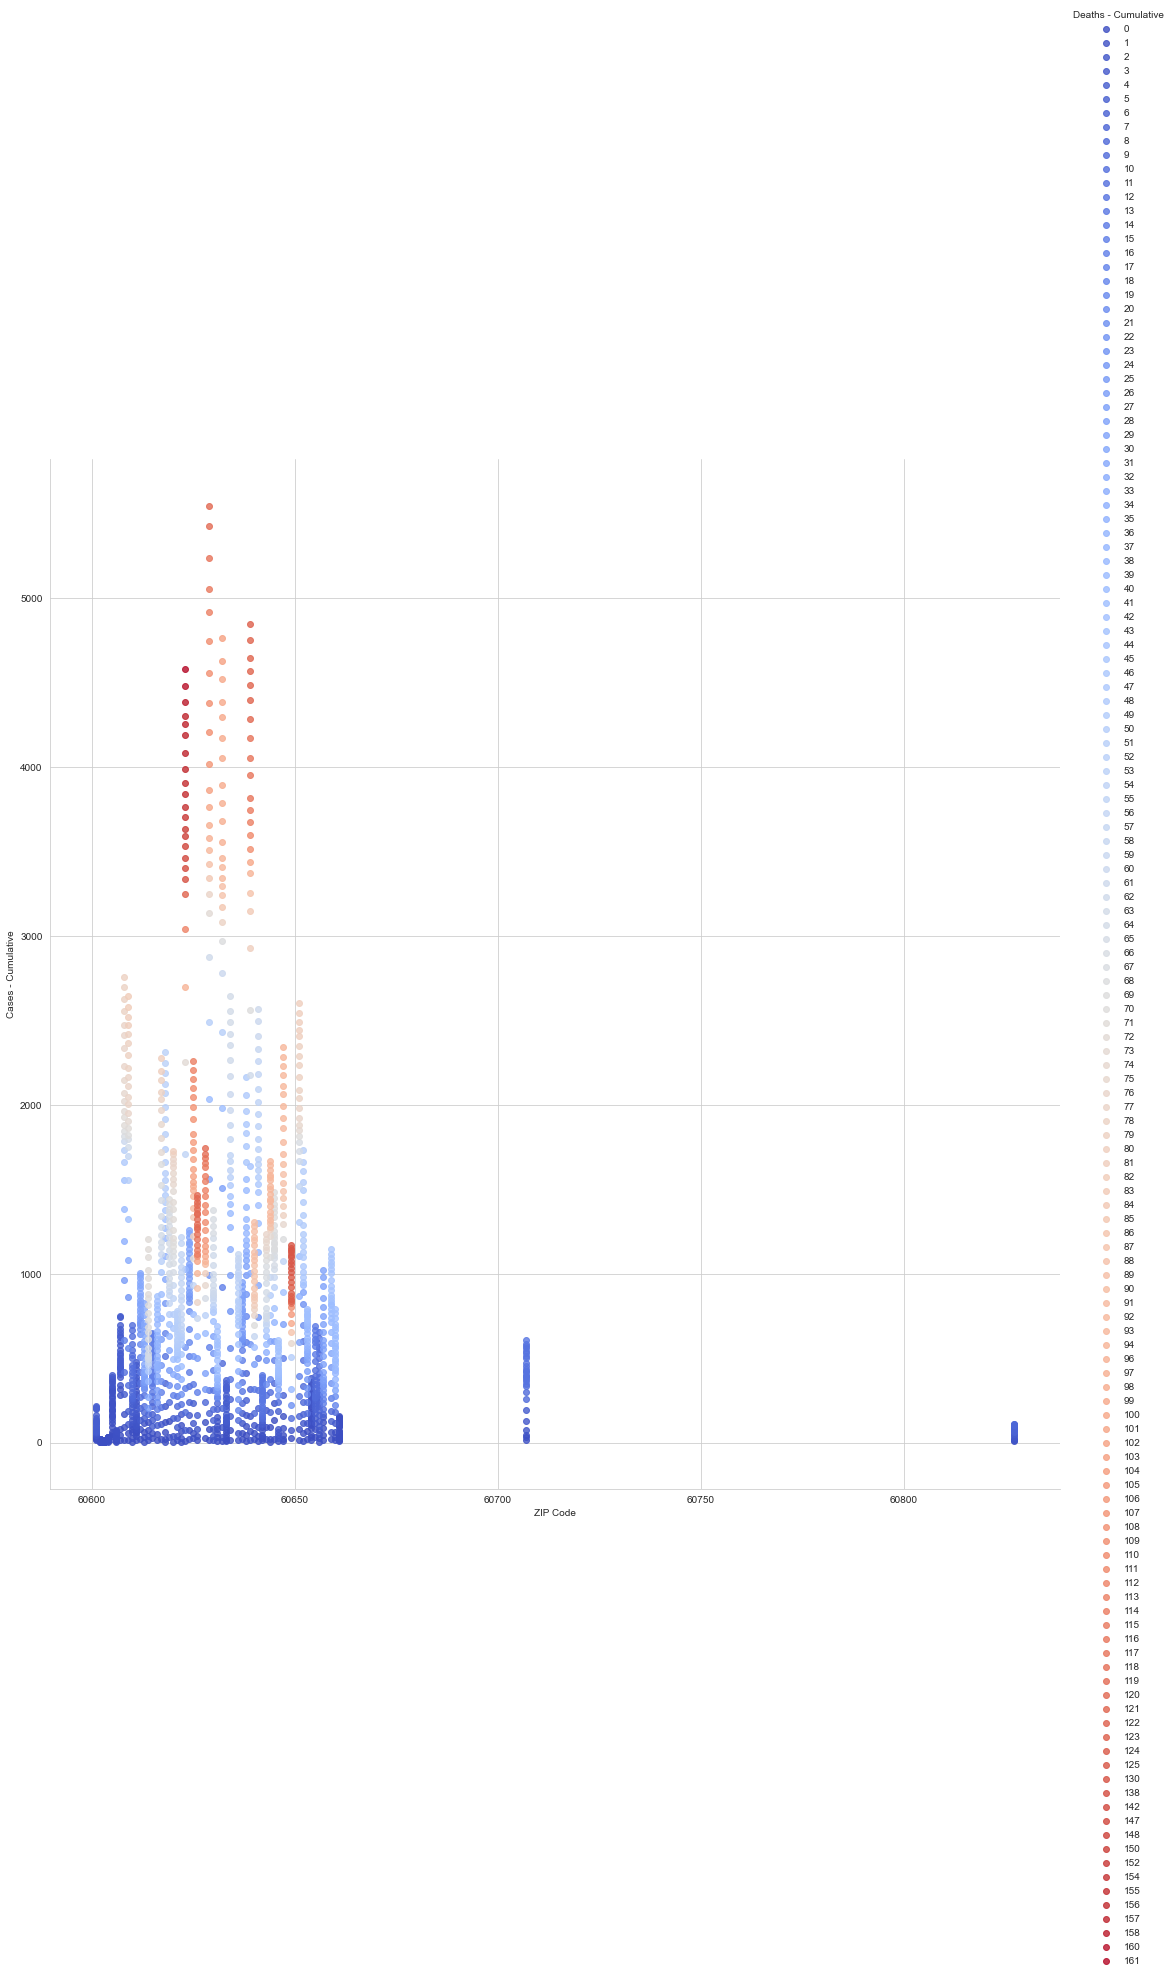

In [99]:
sns.set_style('whitegrid')
sns.lmplot('ZIP Code','Cases - Cumulative',data=df, hue='Deaths - Cumulative', palette='coolwarm',size=15,aspect=1,fit_reg=False)

In [100]:
from sklearn.cluster import KMeans

In [107]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [108]:
kmeans.fit(df.drop('Deaths - Cumulative',axis=1))

KMeans(max_iter=3000, n_clusters=2, n_init=3, random_state=1)

In [109]:
kmeans.cluster_centers_

array([[6.06385558e+04, 2.61658440e+01, 2.58884501e+01, 4.45369200e+02,
        8.01312932e+01, 1.36590513e+03, 2.79191510e+02, 3.35283119e+03,
        9.42383021e+02, 1.16472570e+04, 1.58923001e+01, 1.72951629e-01,
        1.13425469e+00, 2.93188549e+00, 5.97063179e+01, 3.16616861e+04],
       [6.06287868e+04, 2.60230061e+01, 8.48788344e+01, 1.45252147e+03,
        1.09585890e+02, 1.87809095e+03, 6.24811350e+02, 8.25367485e+03,
        8.35625767e+02, 1.10629147e+04, 1.56288344e-01, 2.17638037e-01,
        2.79907975e+00, 3.72438650e+00, 7.65046012e+01, 7.47968359e+04]])

In [110]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [111]:
df['Cluster'] = df['Deaths - Cumulative'].apply(converter)

In [113]:
df

,ZIP Code,Week Number,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Cluster
0,60603,39,0,13,0,1107.3,25.0,327,2130.0,27853.5,0.0,0.0,0,0,0.0,0.0,1174,0
1,60604,39,0,31,0,3964.2,12.0,339,1534.0,43350.4,0.0,0.1,0,0,0.0,0.0,782,0
2,60611,16,8,72,25,222.0,101.0,450,312.0,1387.8,0.1,0.2,0,0,0.0,0.0,32426,0
3,60611,14,16,57,49,175.8,74.0,290,228.0,894.3,0.2,0.2,0,0,0.0,0.0,32426,0
4,60611,15,7,64,22,197.4,59.0,349,182.0,1076.3,0.1,0.2,0,0,0.0,0.0,32426,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,60656,40,35,653,127,2367.7,248.0,5825,899.0,21121.1,0.1,0.1,0,11,0.0,39.9,27579,0
1661,60620,40,21,1728,31,2537.6,412.0,14675,605.0,21550.5,0.1,0.1,2,80,2.9,117.5,68096,0
1662,60605,40,8,399,29,1449.9,324.0,7484,1177.0,27195.8,0.0,0.1,1,4,3.6,14.5,27519,0
1663,60652,40,70,1733,159,3947.0,315.0,9656,717.0,21991.9,0.2,0.2,1,51,2.3,116.2,43907,0


In [114]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[1013  652]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      1665
           1       0.00      0.00      0.00         0

    accuracy                           0.61      1665
   macro avg       0.50      0.30      0.38      1665
weighted avg       1.00      0.61      0.76      1665



C:\Users\Sanaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import matplotlib.pyplot as plt
plt.scatter(df); 
plt.show()

NameError: name 'df' is not defined